# Neural Networks

A deep neural network is a layered representation of data. The term "deep" refers to the presence of multiple layers.It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it.

## How it works

On a lower level neural networks are simply a combination of elementry math operations and some more advanced linear algebra. Each neural network consists of a sequence of layers in which data passes through. These layers are made up on neurons and the neurons of one layer are connected to the next. These connections are defined by what we call a ***weight*** (some numeric value). Each layer also has something called a ***bias***, this is simply an extra neuron that has no connections and holds a single numeric value. Data starts at the input layer and is trasnformed as it passes through subsequent layers. The data at each subsequent neuron is defined as the following.

> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at each layer, this is a constant

> $n$ is the number of connections

> $Y$ is the output of the current neuron

> $\sum$ stands for sum

This equation is called a weighted sum. At each and every neuron, information is passed through the network. Then, the bias is added to the sum. With an activation function ***F(x)***, the equation is seen below.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

Initally, the network starts with predefined activation functions but random weights and bias. As we train, it will learn the correct weights and biases and adjust the network with a technique called ***backpropagation*** (explained below). With the correct weights and biases, predictions can be observed at the final layer, the output layer.

## Key Concepts

### Data
Data is needed to train the network, and the shape and kind of data is variable. Some common types are:
- Vector Data (2D)
- Timeseries or Sequence (3D)
- Image Data (4D)
- Video Data (5D)

### Layers
Each neural networks has multiple layers, and at each layer, a different transformation of data occurs.

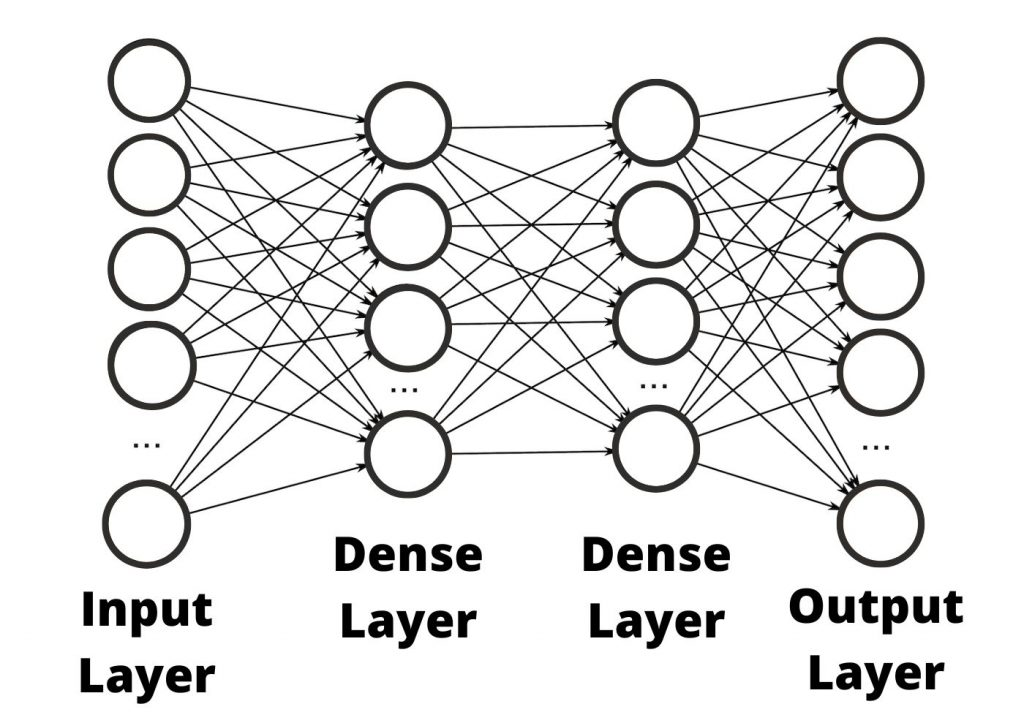

#### Input Layer
This is where the initial data is passed to.
#### Output Layer
This is where predictions are made.
#### Hidden Layer(s)
All other layers between the input and output are the hidden layers.
#### Neurons
Each layer is made of neurons, and each neuron is responsible for generating/holding/passing ONE numeric value.

In the case of the input layer, there are as many neurons as there is input information. For example, a 28x28 pixel image is 784 pixels, so 784 neurons is required for the input layer to capture each pixel.

Likewise for output layer, there are as many neurons as there is output information. For example, an image classification between cats and dogs can have two outputs, probability its a dog or cat. Therefore, two neurons are required at the output layer for each probability.

For hidden layers, the number of neurons is variable.
#### Connected Layers
Layers are connected by connections between neurons. An example of a type of connection is **dense** layers where a neuron in a previous layer connects to every neuron in the present layer. 
### Weights
Each pair of connected nodes will have one weight that denotes the strength between them. From the above equation, its a scalar multiplier. The value starts out constant or random, and the model decides the value of the weights when training.
### Biases
Biases are similar to weights except they are an addition rather than a multiplier. They behave similiar to weights in that they start out constant or random and adjust as training occurs.
### Activation Function
Activation functions are functions are are applied to the weighted sum of a neuron. These functions can do anything, but a typical use case is to increase dimensions to our data for more complex but better predictions. Some examples are:
- Relu (Rectified Linear Unit)

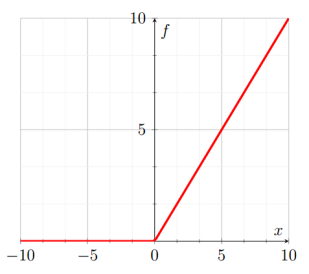
- Tanh (Hyperbolic Tangent)

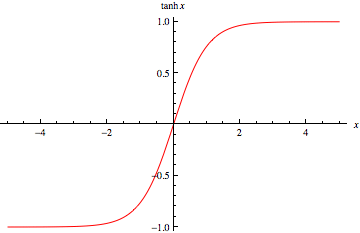
- Sigmoid

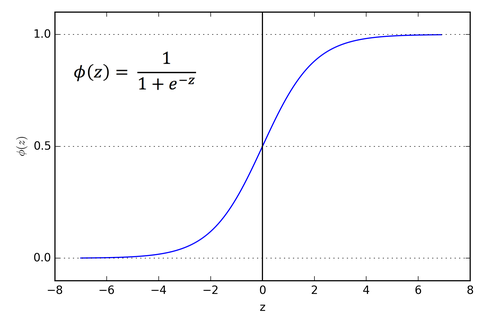

### Backprogation
The backprogation is the algorithm that changes the weights and biases of the network.
#### Loss/cost Function
For the backprogation algorithm to know how to change weights and biases, it needs a number to to compare the output from the network to the expected output. This number can be obtained by using training features (input) and labels (expected outputs). The cost/loss function determines how well the network is performing by comparing current values to previous values. If the change is minor, little improvement is made, and this is usually an indicator that the network is performing well. Some examples of loss/cost functions are:
- Mean Squared Error (mae)
- Mean Absolute Error (mse)
- Hinge Loss
#### Optimizer
Optimzers are used to find the optimal parameters for the network. Some examples are:
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

Explanation for different types of optimizers:
(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

## Creating a Neural Network

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Dataset
MNIST Fashion Dataset (included in keras) includes 60000 images for training and 10000 for validation/testing

In [18]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training

#### What is the Data

In [19]:
train_images.shape

(60000, 28, 28)

From the shape, we can see 60000 images with 28x28 dimensions.

In [20]:
train_images[0,12,:] # let's have a look a column

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
       244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
       167,  56], dtype=uint8)

When looking at a column, we see a numbers between 0 and 255 which is typical for images since 0 to 255 is representative of hex numbers. Furthermore, it is only single numbers rather than a channel (rgb channels), so the images are 28x28 greyscale images.

In [22]:
train_labels[:25] # let's have a look at the first 25 training labels, could also loop through labels and find unique numbers

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4], dtype=uint8)

Looking at the first 25 training labels, we see a range from 0 - 9 where each integer corresponds with a specific article of clothing.

To visualize it:

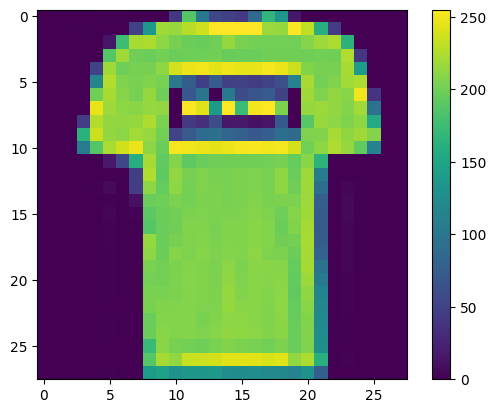

In [23]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

The above snippets were made to try to understand how to view and understand the data assuming that no prior knowledge is provdided.

Since this dataset is well used, we can refer to https://github.com/zalandoresearch/fashion-mnist for more information which include the labels which we define below.

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Preprocessing
Before feeding our information into the model, we can simplify all greyscale images (0-255) to between 0 and 1. The reasoning is that weights and biases are typically started between 0 and 1 (unless stated otherwise), so we can make the work easier for the model if we feed it numbers that is closer to what it is expecting.

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Building the Model
We will use a keras ***sequential*** model with three different layers. This model represents a feed-forward neural network (one that passes from left to right).

Flatten automatically creates an input, so a 28x28 shape will flatten to (batch, 784) or (None, 784). 784 pixel images means we require 784 input neurons which is what flatten achieves.

The output layer equals the number of classes in the dataset which is 10 for the different types of clothing.

Dense and relu activation function are defined above, but softmax is an activation function that ensures that the sum of the neurons add to 1 which is good for probability outputs. 

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

#### **Layer 1:**
This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

#### **Layer 2:**
This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

#### **Layer 3:**
This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

### Compiling the Model
To compile the model, we need to define the loss function, optimizer, and metrics to track. Something important to note is that these parameters can be changed unlike the above snippet when we define the layer sizes and activation functions. One can changing these parameters and comparing them, and that is called hyperparameter tuning.

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model
We use a builtin method from keras.

In [28]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5002 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3754 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3374 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3119 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2926 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2798 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2571 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2456 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.236

### Evalutation the Model
We use a builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar." (https://keras.io/models/sequential/)

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8797
Test accuracy: 0.8797000050544739


Notice that the test accuracy is lower than the training accuracy. This is called ***overfitting***. When training the model, the network sees the images each to the defined epoch value. Therefore, if we increased the epoch value, the network essentially "memorizes" the data. This is bad since we want to generalize the model for prediction. Thus, when training, it is important to ***early stop*** to prevent overfitting and overtraining the model.

Here we will retrain the model with 8 epochs instead of 10. Note, we recompile the model since rerunning ```.fit()``` simply adds on top of the current model.

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2487 - accuracy: 0.9068
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2369 - accuracy: 0.9121
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2281 - accuracy: 0.9154
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2235 - accuracy: 0.9155
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2161 - accuracy: 0.9189
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2104 - accuracy: 0.9212
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2033 - accuracy: 0.9241
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1987 - accuracy: 0.9259
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1914 - accuracy: 0.9289
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.189

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 917us/step - loss: 0.3987 - accuracy: 0.8898
Test accuracy: 0.8898000121116638


In this case, increasing the epoch value slightly increased the test accuracy. This may be the case since the testing data may be very similar to the training data.

### Prediction
To run predictions, we run another builtin keras method, and lets take a look at the prediction for the first index. The prediction gave us an array with 10 numbers which correspond for each class. The sum of the array is equal to 1 since each number is a probability for each class.

In [40]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 830us/step


array([2.0879298e-11, 1.7498381e-16, 3.2911866e-17, 1.2951742e-19,
       3.9165313e-16, 3.6324852e-06, 2.0172686e-13, 6.5733642e-05,
       1.6091636e-12, 9.9993062e-01], dtype=float32)

We can find the highest probability by finding the highest number with ```argmax()```.

In [42]:
np.argmax(predictions[0])

9

Now we can check if the prediction is correct.

In [43]:
test_labels[0]

9

Here is a function to verify predictions with simple visuals.

1/1 [==============================] - 0s 14ms/step


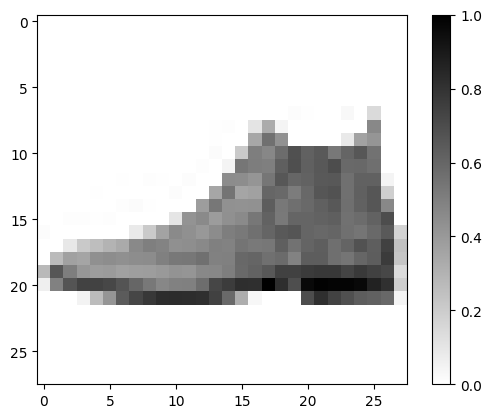

Expected: Ankle boot
Guess: Ankle boot


In [45]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()

  print("Expected: " + label)
  print("Guess: " + guess)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)